# 경기도에서 공개한 코로나19 발생동향 분석

* http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('2_data.csv')

In [4]:
df=df.sort_values('연번',ascending=False)

In [6]:
df.head(2)

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,"""구분"""
20335,20336,80121,M,73,70,2021. 2. 4.,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,구분
20334,20335,80131,M,34,30,2021. 2. 4.,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,구분


# 확진일

In [9]:
df['확진일자'].value_counts().head(5)

2020. 12. 15.    411
2020. 12. 22.    330
2021. 1. 6.      323
2020. 12. 11.    309
2020. 12. 14.    304
Name: 확진일자, dtype: int64

In [10]:
df['확진일자'].head(5)#문자형

20335    2021. 2. 4.
20334    2021. 2. 4.
20333    2021. 2. 4.
20332    2021. 2. 4.
20331    2021. 2. 4.
Name: 확진일자, dtype: object

In [11]:
df['확진일자'].tail()

4     2020. 2. 5.
3     2020. 2. 2.
2     2020. 2. 1.
1    2020. 1. 27.
0    2020. 1. 26.
Name: 확진일자, dtype: object

In [17]:
df['확진일자_d']=pd.to_datetime(df['확진일자'])
df[['확진일자','확진일자_d']].describe()

,확진일자,확진일자_d
count,20336,20336
unique,355,355
top,2020. 12. 15.,2020-12-15 00:00:00
freq,411,411
first,NaN,2020-01-26 00:00:00
last,NaN,2021-02-04 00:00:00


In [20]:
df["월"]=df["확진일자_d"].dt.month

In [75]:
"df['년']""+"df['월']""

SyntaxError: invalid syntax (<ipython-input-75-f16affef10ae>, line 1)

In [21]:
df['주']=df['확진일자_d'].dt.week

In [72]:
df['년']=df['확진일자_d'].dt.year

## 선그래프 그리기

In [41]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'확진일자별 확진자 수'}>

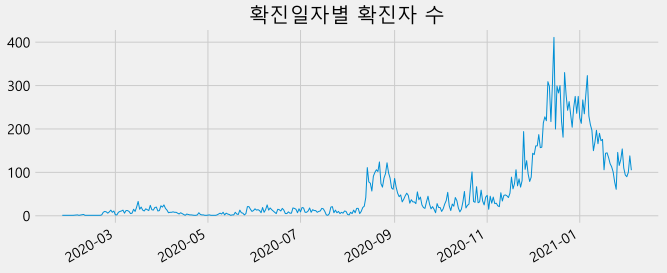

In [42]:
df['확진일자_d'].value_counts().plot(title="확진일자별 확진자 수",figsize=(10,4),grid=True,linewidth=1)


## 확진자가 가장 많이 나온 날

In [45]:
df['확진일자_d'].describe()

count                   20336
unique                    355
top       2020-12-15 00:00:00
freq                      411
first     2020-01-26 00:00:00
last      2021-02-04 00:00:00
Name: 확진일자_d, dtype: object

In [50]:
df[df['확진일자_d']=='2020-12-15']

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,"""구분""",확진일자_d,월,주
13472,13473,56835,M,62,60,2020. 12. 15.,NaN,무증상,하남-246,하남,,불명확,,NaN,,구분,2020-12-15,12,51
11939,11940,49800,M,20,20,2020. 12. 15.,NaN,무증상,파주-306,파주,,불명확,,NaN,,구분,2020-12-15,12,51
10874,10875,47344,F,54,50,2020. 12. 15.,2020. 12. 14.,,고양-1099,고양일산동,,불명확,,NaN,,구분,2020-12-15,12,51
10873,10874,47300,M,40,40,2020. 12. 15.,2020. 12. 14.,,평택-617,평택,,불명확,,NaN,,구분,2020-12-15,12,51
10872,10873,47026,M,18,10,2020. 12. 15.,NaN,무증상,수원-641,수원장안,,불명확,,NaN,,구분,2020-12-15,12,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,10273,44557,M,28,20,2020. 12. 15.,2020. 12. 13.,,안양-470,안양만안,,불명확,,NaN,,구분,2020-12-15,12,51
10271,10272,44565,F,66,60,2020. 12. 15.,NaN,무증상,안양-469,안양만안,,불명확,,NaN,,구분,2020-12-15,12,51
10270,10271,44566,M,42,40,2020. 12. 15.,NaN,무증상,안양-468,안양만안,,불명확,,NaN,,구분,2020-12-15,12,51
10269,10270,44519,F,1,0,2020. 12. 15.,2020. 12. 14.,,과천-49,과천,,불명확,,NaN,,구분,2020-12-15,12,51


## 막대그래프 그리기

<AxesSubplot:>

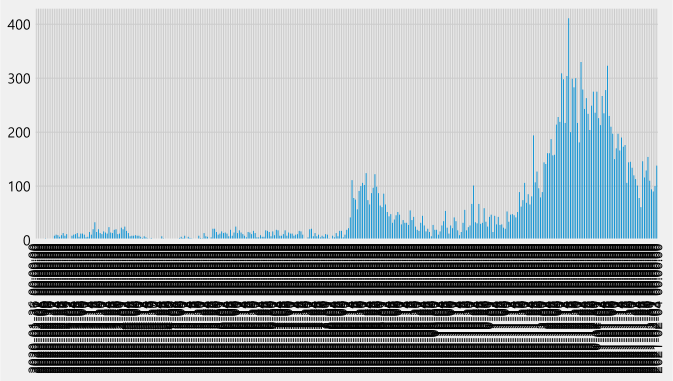

In [63]:
day_count=df['확진일자_d'].value_counts().sort_index()
day_count.plot.bar(figsize=(10,4))

## 최근 데이터만 슬라이싱으로 나눠 그리기

<AxesSubplot:>

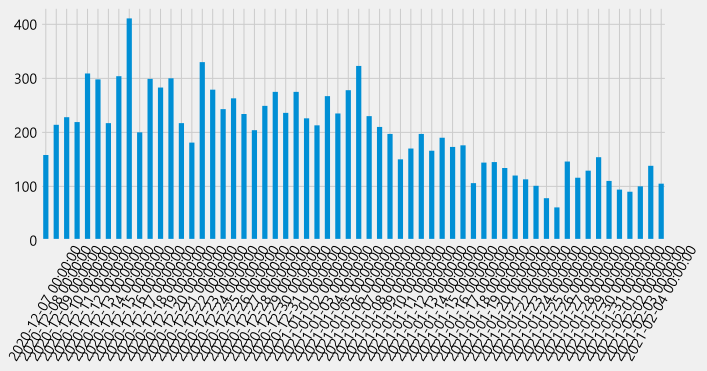

In [66]:
day_count[-60:].plot.bar(figsize=(10,4),rot=60)

## 월별 확진자 수 그리기

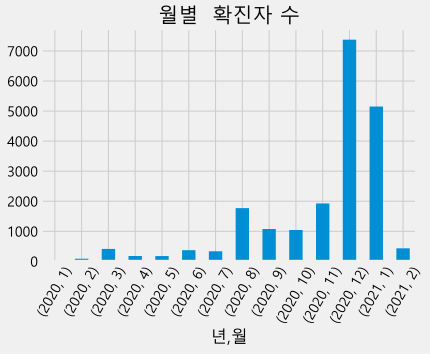

In [117]:
month_count=df.groupby('년')['월'].value_counts().sort_index().plot.bar(rot=60,title="월별  확진자 수")

## 주단위 확진자수 그리기

<AxesSubplot:title={'center':'주별 확진자 수 '}, xlabel='년,주'>

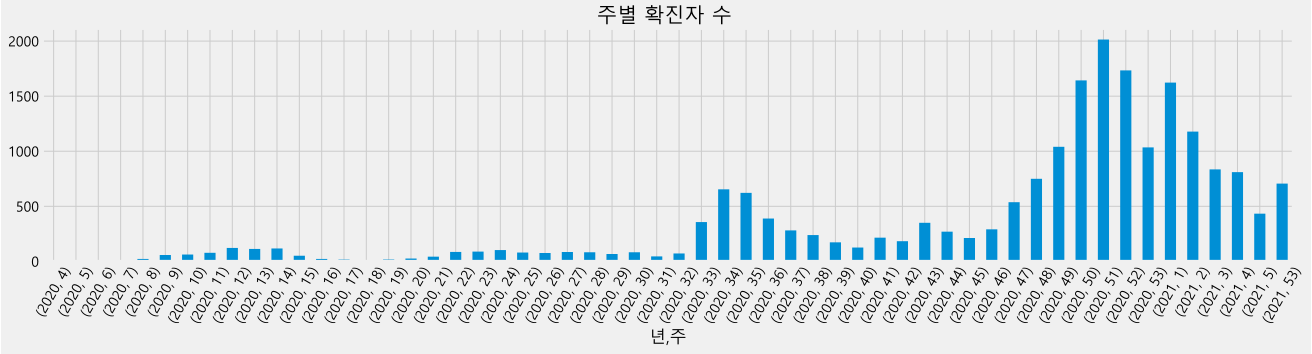

In [116]:
df.groupby('년')[ '주'].value_counts().sort_index().plot.bar(figsize=(20,4),title="주별 확진자 수 ",rot=60,xlabel='년,주')

# 모든 날짜를 행에 만들어  주기 

In [119]:
df['확진일자_d'].value_counts().sort_index()

2020-01-26      1
2020-01-27      1
2020-02-01      1
2020-02-02      1
2020-02-05      2
             ... 
2021-01-31     94
2021-02-01     90
2021-02-02    100
2021-02-03    138
2021-02-04    105
Name: 확진일자_d, Length: 355, dtype: int64

In [120]:
first_day=df.iloc[-1]['확진일자_d']

In [124]:
last_day=df.iloc[0]['확진일자_d']

In [126]:
days=pd.date_range(first_day,last_day)

In [134]:
df_days=days.to_frame()
df_days

,0
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30
...,...
2021-01-31,2021-01-31
2021-02-01,2021-02-01
2021-02-02,2021-02-02
2021-02-03,2021-02-03


In [130]:
daily_case=df['확진일자_d'].value_counts().sort_index()

In [131]:
df_daily_case=daily_case.reset_index()

In [133]:
df_daily_case.columns=['확진일자_d','확진수']
df_daily_case

,확진일자_d,확진수
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-05,2
...,...,...
350,2021-01-31,94
351,2021-02-01,90
352,2021-02-02,100
353,2021-02-03,138


## merge를 통해 전체 확진일자 만들기


In [135]:
all_day=df_days.merge(df_daily_case,left_on=df_days.index,right_on='확진일자_d',how='left')
all_day=all_day.drop(0,axis=1)
all_day

,확진일자_d,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,NaN
3,2020-01-29,NaN
4,2020-01-30,NaN
...,...,...
371,2021-01-31,94.0
372,2021-02-01,90.0
373,2021-02-02,100.0
374,2021-02-03,138.0


# 누적 확진자 수 구하기

In [136]:
all_day=all_day.fillna(0)

In [138]:
all_day['일자']=all_day['확진일자_d'].astype(str).str[-5:]
all_day

,확진일자_d,확진수,일자
0,2020-01-26,1.0,01-26
1,2020-01-27,1.0,01-27
2,2020-01-28,0.0,01-28
3,2020-01-29,0.0,01-29
4,2020-01-30,0.0,01-30
...,...,...,...
371,2021-01-31,94.0,01-31
372,2021-02-01,90.0,02-01
373,2021-02-02,100.0,02-02
374,2021-02-03,138.0,02-03


In [140]:
all_day['누적확진']=all_day['확진수'].cumsum()
all_day.head(10)

,확진일자_d,확진수,일자,누적확진
0,2020-01-26,1.0,01-26,1.0
1,2020-01-27,1.0,01-27,2.0
2,2020-01-28,0.0,01-28,2.0
3,2020-01-29,0.0,01-29,2.0
4,2020-01-30,0.0,01-30,2.0
5,2020-01-31,0.0,01-31,2.0
6,2020-02-01,1.0,02-01,3.0
7,2020-02-02,1.0,02-02,4.0
8,2020-02-03,0.0,02-03,4.0
9,2020-02-04,0.0,02-04,4.0


## 데이터프레임으로  그리기

<AxesSubplot:title={'center':'확진수와 누적확진수'}, xlabel='확진일자_d'>

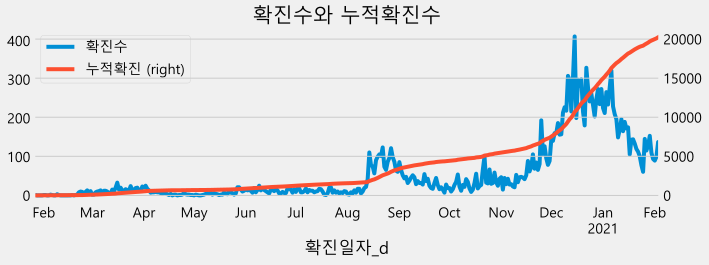

In [143]:
all_day.set_index('확진일자_d')[['확진수','누적확진']].plot(figsize=(10,3),title='확진수와 누적확진수',secondary_y='누적확진')

In [178]:
df['시']=df['경기번호'].str.partition(sep="-")[0]+"시"


<AxesSubplot:title={'center':'시별  확진자 수'}>

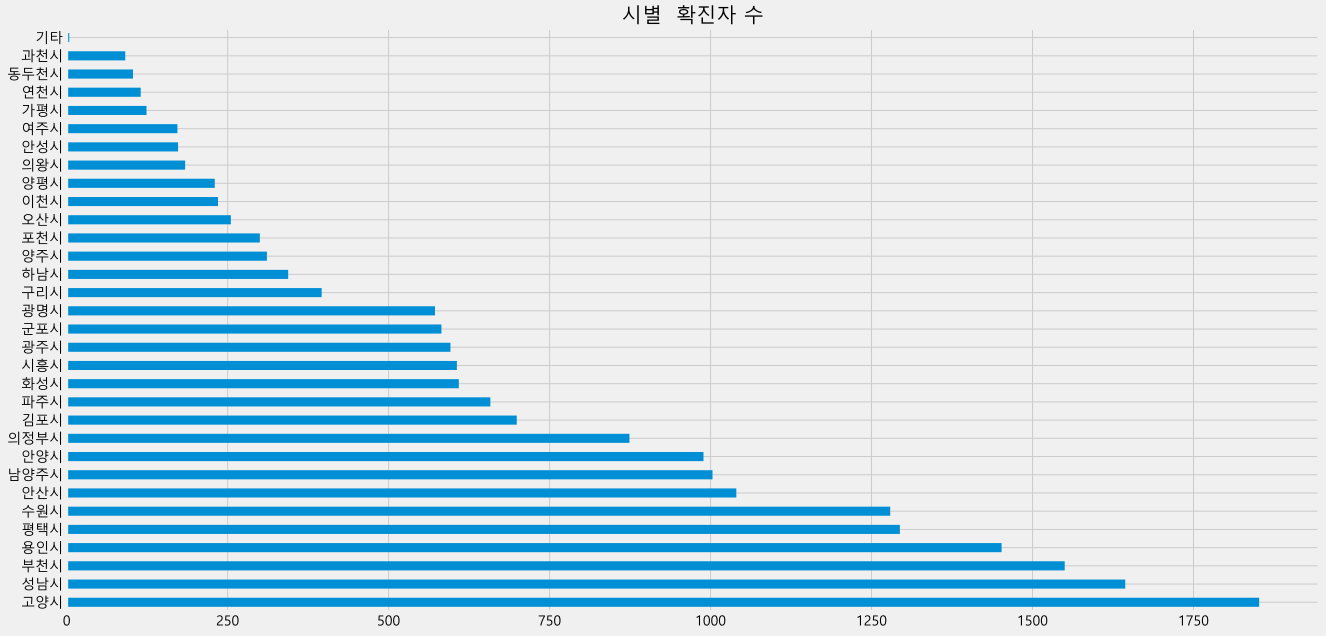

In [186]:
df['시'].value_counts().plot.barh(figsize=(20,10),title="시별  확진자 수")

In [185]:
df['시'].value_counts() 

고양시     1852
성남시     1644
부천시     1550
용인시     1452
평택시     1294
수원시     1279
안산시     1040
남양주시    1003
안양시      989
의정부시     874
김포시      699
파주시      658
화성시      609
시흥시      606
광주시      596
군포시      582
광명시      572
구리시      396
하남시      344
양주시      311
포천시      300
오산시      255
이천시      235
양평시      230
의왕시      184
안성시      173
여주시      172
가평시      124
연천시      115
동두천시     103
과천시       91
기타         4
Name: 시, dtype: int64

In [184]:
df.loc[df["시"]=="현시","시"]="기타"
df.loc[df["시"]=="갈희영시","시"]="기타"
df.loc[df["시"]=="강사(장애인복지관 국악강사)시","시"]="기타"
df.loc[df["시"]=="이주연시","시"]="기타"

## 해외유입 확진자가 가장많이 나온시

<AxesSubplot:title={'center':'해외유입 확진자 수 '}>

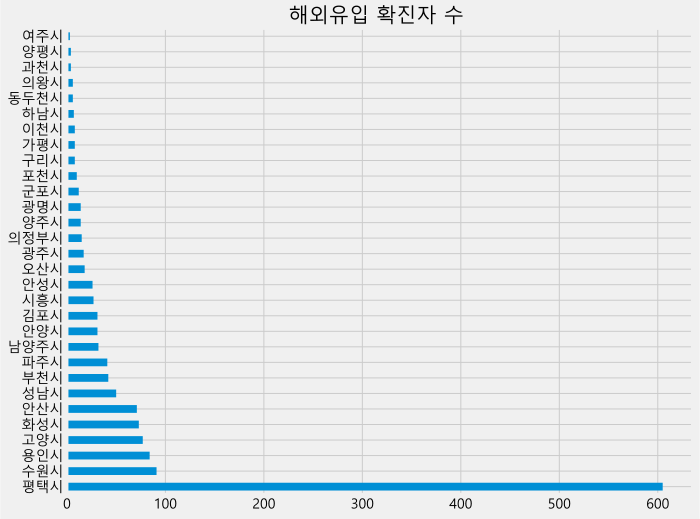

In [203]:
df.loc[df['감염경로']=="해외유입",'시'].value_counts().plot.barh(figsize=(10,8),title="해외유입 확진자 수 ")

In [217]:
df.loc[df['감염경로']=="해외유입",'시'].value_counts()

평택시     605
수원시      91
용인시      84
고양시      77
화성시      73
안산시      71
성남시      50
부천시      42
파주시      41
남양주시     32
안양시      31
김포시      31
시흥시      27
안성시      26
오산시      18
광주시      17
의정부시     15
양주시      14
광명시      14
군포시      12
포천시      10
구리시       8
가평시       8
이천시       8
하남시       7
동두천시      6
의왕시       6
과천시       4
양평시       4
여주시       3
Name: 시, dtype: int64

<AxesSubplot:title={'center':'월별 해외유입 확진자 수 '}, xlabel='년,월'>

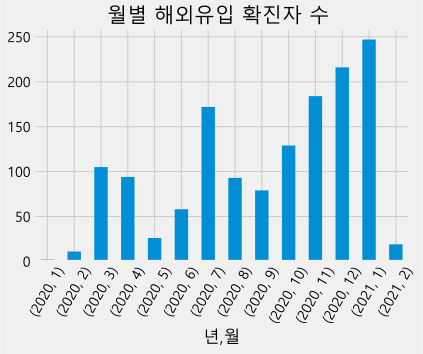

In [226]:
df.loc[df['감염경로']=="해외유입",["년",'월']].value_counts().sort_index().plot.bar(title="월별 해외유입 확진자 수 ",rot=60)

In [215]:
df.groupby("년")["월"].value_counts()

년     월 
2020  12    7377
      11    1926
      8     1771
      9     1075
      10    1043
      3      412
      6      371
      7      335
      4      177
      5      175
      2       87
      1        2
2021  1     5152
      2      433
Name: 월, dtype: int64